In [32]:
from nltk.corpus import stopwords
from collections import Counter
import pandas as pd
import numpy as np

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

###  Let's take a look at the head and the format of the data

In [33]:
df = pd.read_csv('donald_tweets.csv', parse_dates=[1])
df.head()

,id,created_at,text
0,704466049912143872,2016-03-01 00:39:29,"Thank you Brian France, Bill Elliott, @chaseelliott, @DavidRagan, &amp; @RyanJNewman! #NASCAR #Trump2016 #VoteTrump\nhttps://t.co/6UDcvm1GB2"
1,704440884029493248,2016-02-29 22:59:29,"Phony Rubio commercial. I could have settled, but won't out of principle! See student surveys. https://t.co/KKHiBH554d"
2,704438057202819072,2016-02-29 22:48:15,Trump University has a 98% approval rating. I could have settled but won't out of principle!
3,704392435829493764,2016-02-29 19:46:58,"Thank you Virginia! 15,000 amazing supporters! Everyone get out and #VoteTrump tomorrow! https://t.co/Zg0OhOdtkV"
4,704379918222696449,2016-02-29 18:57:13,My wife @MELANIATRUMP will be joining @andersoncooper @AC360 tonight at 8pmE on @CNN. Enjoy! https://t.co/aTIXHgK32N


### Great now let's do some munging to fix the text

In [34]:
df['text'] = df['text'].map(lambda x: x.lower())
df.head()

,id,created_at,text
0,704466049912143872,2016-03-01 00:39:29,"thank you brian france, bill elliott, @chaseelliott, @davidragan, &amp; @ryanjnewman! #nascar #trump2016 #votetrump\nhttps://t.co/6udcvm1gb2"
1,704440884029493248,2016-02-29 22:59:29,"phony rubio commercial. i could have settled, but won't out of principle! see student surveys. https://t.co/kkhibh554d"
2,704438057202819072,2016-02-29 22:48:15,trump university has a 98% approval rating. i could have settled but won't out of principle!
3,704392435829493764,2016-02-29 19:46:58,"thank you virginia! 15,000 amazing supporters! everyone get out and #votetrump tomorrow! https://t.co/zg0ohodtkv"
4,704379918222696449,2016-02-29 18:57:13,my wife @melaniatrump will be joining @andersoncooper @ac360 tonight at 8pme on @cnn. enjoy! https://t.co/atixhgk32n


### Okay, I want to take the text and break it up into tokens and then use the tlk module to remove the stop words.

### Stop words are considered non-important words like "the, and, it" etc.

In [35]:
#import english stop words from tlk and setup as set
#a lot faster as a set
stop = set(stopwords.words('english'))

#split the text
df['text_split'] = df['text'].map(lambda x: x.split())

#use a lambda function and list comprehension to compare words in each cell with stop
df['text_split'] = df['text_split'].map(lambda x: [x for x in x if x not in stop])

### Let's take a look

In [36]:
df.head()

,id,created_at,text,text_split
0,704466049912143872,2016-03-01 00:39:29,"thank you brian france, bill elliott, @chaseelliott, @davidragan, &amp; @ryanjnewman! #nascar #trump2016 #votetrump\nhttps://t.co/6udcvm1gb2","[thank, brian, france,, bill, elliott,, @chaseelliott,, @davidragan,, &amp;, @ryanjnewman!, #nascar, #trump2016, #votetrump, https://t.co/6udcvm1gb2]"
1,704440884029493248,2016-02-29 22:59:29,"phony rubio commercial. i could have settled, but won't out of principle! see student surveys. https://t.co/kkhibh554d","[phony, rubio, commercial., could, settled,, won't, principle!, see, student, surveys., https://t.co/kkhibh554d]"
2,704438057202819072,2016-02-29 22:48:15,trump university has a 98% approval rating. i could have settled but won't out of principle!,"[trump, university, 98%, approval, rating., could, settled, won't, principle!]"
3,704392435829493764,2016-02-29 19:46:58,"thank you virginia! 15,000 amazing supporters! everyone get out and #votetrump tomorrow! https://t.co/zg0ohodtkv","[thank, virginia!, 15,000, amazing, supporters!, everyone, get, #votetrump, tomorrow!, https://t.co/zg0ohodtkv]"
4,704379918222696449,2016-02-29 18:57:13,my wife @melaniatrump will be joining @andersoncooper @ac360 tonight at 8pme on @cnn. enjoy! https://t.co/atixhgk32n,"[wife, @melaniatrump, joining, @andersoncooper, @ac360, tonight, 8pme, @cnn., enjoy!, https://t.co/atixhgk32n]"


### Great we can see that all of the tweets have been broken into a list of words and the stopwords have been removed

### Now let's take a look at the top words in his tweets

In [70]:
#df[df['text'].isin(['great'])]

words =[]
test = map(lambda x: words.extend(x), df.text_split)
words.sort()

count = Counter(words)
count.most_common(10)

[('@realdonaldtrump', 751),
 ('trump', 453),
 ('great', 445),
 ('thank', 341),
 ('#trump2016', 282),
 ('&amp;', 243),
 ('-', 243),
 ('new', 227),
 ('#makeamericagreatagain', 177),
 ('america', 167)]

### My dad actually asked me how many "swear" words did he have in his tweets? To do that we would pass a list in and parse the count dictionary with the list

In [71]:
#dad asked how many "swear" words does trump have in his tweets
test = ['hell','damn','idiot','stupid']
for word in test:
    print word, count[word]

hell 5
damn 2
idiot 1
stupid 2


#### Hmm...doesn't look like he swears a lot

### He definitely talks a lot about himself. Let's dive deeper into the counts of his tweets.

In [72]:
#create new data frame with words counts
word_count = pd.DataFrame(count.items(), columns=['word','count'])

### What we are doing is taking that dictionary that we created with Counter and putting it into a dataframe. Pandas has awesome methods for importing almost anything into a dataframe.

In [78]:
word_count.sort(['count'], ascending=0).head()

,word,count
6999,@realdonaldtrump,751
9880,trump,453
1987,great,445
6931,thank,341
6679,#trump2016,282


### So "great" is one of the top words, that could be interesting. Let's get some descriptive stats.

In [79]:
word_count = word_count.sort(columns='count',ascending=False)
word_count.reset_index()
word_count.describe()

,count
count,11983.000000
mean,3.009597
std,12.888483
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,751.000000


### Let's subset the frame with anything over the standard dev of 13 and reset the index

In [95]:
greater_sd = word_count[word_count['count']>13].reset_index()

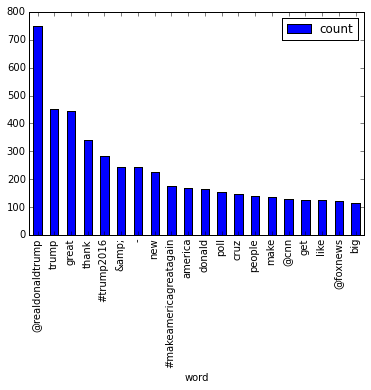

In [96]:
greater_sd.head(20).plot(x='word',y='count',kind='bar')

### Here we are looking at the normalization of the words within the subset above the standard deviation, and looking to see on what percentage of the time Donald is saying something. I also wanted to look at who Donald is tweeting at.

In [101]:
greater_mean = greater_mean[['word','count']]
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')
greater_mean['count_percentage'] = greater_mean['count']/15391*100

In [128]:
tweet_at = filter(lambda x: "@" in x, greater_mean['word'])
greater_mean[greater_mean['word'].isin(tweet_at)]

,word,count,count_percentage
0,@realdonaldtrump,751,4.879475
15,@cnn,130,0.844649
18,@foxnews,122,0.792671
68,@jebbush,48,0.311871
92,@seanhannity,39,0.253395
133,@megynkelly,32,0.207914
172,"@realdonaldtrump""",26,0.168930
188,@oreillyfactor,25,0.162433
196,@morning_joe,24,0.155935
230,@foxandfriends,22,0.142941


### Looks like he tweets the most at Jebbush, Megynkelly, and Foxnews. Kind of interesting, let's look at the make up of those tweets.

In [148]:
df[df['text'].str.contains('megynkelly')]

,id,created_at,text,text_split
256,699805136038846464,2016-02-17 03:58:40,"why does @megynkelly devote so much time on her shows to me, almost always negative? without me her ratings would tank. get a life megyn!","[@megynkelly, devote, much, time, shows, me,, almost, always, negative?, without, ratings, would, tank., get, life, megyn!]"
257,699802531992629248,2016-02-17 03:48:19,"""@debdew2: @brithume @megynkelly @diamondandsilk fox: trump haters r scared because they lose - trump is winning https://t.co/6umglyjwht""","[""@debdew2:, @brithume, @megynkelly, @diamondandsilk, fox:, trump, haters, r, scared, lose, -, trump, winning, https://t.co/6umglyjwht""]"
259,699794784509108224,2016-02-17 03:17:32,"""@good2bqueen67: @brithume @megynkelly they're too lame to get it, sir. when you win the election they'll get it.""","[""@good2bqueen67:, @brithume, @megynkelly, they're, lame, get, it,, sir., win, election, they'll, get, it.""]"
261,699791469532594177,2016-02-17 03:04:22,"explain to @brithume and @megynkelly, who know nothing, that i will beat hillary and win states (and dem-indie votes) that no other r can!","[explain, @brithume, @megynkelly,, know, nothing,, beat, hillary, win, states, (and, dem-indie, votes), r, can!]"
557,692701271405563904,2016-01-28 13:30:27,"""@rkirchmeyer: so @megynkelly brings in #michaelmoore to add credibility in her fight with @realdonaldtrump? #foxnews #rogerailes""","[""@rkirchmeyer:, @megynkelly, brings, #michaelmoore, add, credibility, fight, @realdonaldtrump?, #foxnews, #rogerailes""]"
568,692673742863011842,2016-01-28 11:41:04,"""@dukeofbc: @megynkelly debate cruz one on one. i would just tell him that you were to busy running for the president of usa, not canada""","[""@dukeofbc:, @megynkelly, debate, cruz, one, one., would, tell, busy, running, president, usa,, canada""]"
573,692672615425691648,2016-01-28 11:36:35,"""@gene70: @fireflyfury @megynkelly @realdonaldtrump and this is the bimbo that's asking presidential questions? https://t.co/ou1uugnuwb""","[""@gene70:, @fireflyfury, @megynkelly, @realdonaldtrump, bimbo, that's, asking, presidential, questions?, https://t.co/ou1uugnuwb""]"
580,692479630931001349,2016-01-27 22:49:44,"it was the childishly written &amp; taunting pr statement by fox that made me not do the debate, more so than lightweight reporter, @megynkelly.","[childishly, written, &amp;, taunting, pr, statement, fox, made, debate,, lightweight, reporter,, @megynkelly.]"
610,691942336746635264,2016-01-26 11:14:43,"""@laurencristmann: @sharp_trident @megynkelly it makes me not wanna watch debate because i know they are going to treat trump unfair""","[""@laurencristmann:, @sharp_trident, @megynkelly, makes, wanna, watch, debate, know, going, treat, trump, unfair""]"
612,691850438119952385,2016-01-26 05:09:33,"""@sharp_trident: a huge disappointment to see @megynkelly constantly attack donaldtrump. it has become almost unbearable to watch her show.""","[""@sharp_trident:, huge, disappointment, see, @megynkelly, constantly, attack, donaldtrump., become, almost, unbearable, watch, show.""]"


### In my next post, I'll use this and create a sentiment analysis of trumps tweets to which we can categorize the tweets. However just doing some anecedotal research, it looks like Trump is not a fan of Megyn.

In [109]:
df[df['text'].str.contains('jebbush')]

,id,created_at,text,text_split
137,702194423048699905,2016-02-23 18:12:51,"great. just reported on @foxnews that many people who supported @jebbush are now supporting me. i knew that would happen, pundits didn't!","[great., reported, @foxnews, many, people, supported, @jebbush, supporting, me., knew, would, happen,, pundits, didn't!]"
288,698854046447333376,2016-02-14 12:59:23,"""@autumnandews08: @realdonaldtrump @jebbush jeb is incompetent and will lose, don't waste your energy on that cry baby!""","[""@autumnandews08:, @realdonaldtrump, @jebbush, jeb, incompetent, lose,, don't, waste, energy, cry, baby!""]"
295,698742963447451648,2016-02-14 05:37:59,how can @jebbush beat hillary clinton- if he can't beat anyone else on the #gopdebate stage with $150m? i am the only one who can!,"[@jebbush, beat, hillary, clinton-, can't, beat, anyone, else, #gopdebate, stage, $150m?, one, can!]"
297,698739578002403328,2016-02-14 05:24:32,lightweight @jebbush said tonight he didn't know his family used private eminent domain in texas- lie! \n#gopdebate,"[lightweight, @jebbush, said, tonight, didn't, know, family, used, private, eminent, domain, texas-, lie!, #gopdebate]"
328,698263859753316352,2016-02-12 21:54:11,"millions of $'s of false ads, paid for by lobbyists-special interests of cheater @sentedcruz and sleepy @jebbush, are now running in s.c.","[millions, $'s, false, ads,, paid, lobbyists-special, interests, cheater, @sentedcruz, sleepy, @jebbush,, running, s.c.]"
332,698242702194954240,2016-02-12 20:30:07,"last time lightweight @jebbush tried to knock off @marcorubio he made a total fool of himself. if he doesn't do better this time, he is out!","[last, time, lightweight, @jebbush, tried, knock, @marcorubio, made, total, fool, himself., doesn't, better, time,, out!]"
334,698219929762398209,2016-02-12 18:59:38,lightweight @jebbush is spending a fortune of special interest against me in sc. false advertising- desperate and sad!,"[lightweight, @jebbush, spending, fortune, special, interest, sc., false, advertising-, desperate, sad!]"
380,697027290820186112,2016-02-09 12:00:30,"remember @jebbush wants common core (education from d.c.) and is very weak on illegal immigration (""come as act of love""). not a leader!","[remember, @jebbush, wants, common, core, (education, d.c.), weak, illegal, immigration, (""come, act, love"")., leader!]"
701,690560125916975104,2016-01-22 15:42:18,"after spending $89 million, @jebbush is at the bottom of the barrel in polls. he is ashamed to use the name ""bush"" in ads. low energy guy!","[spending, $89, million,, @jebbush, bottom, barrel, polls., ashamed, use, name, ""bush"", ads., low, energy, guy!]"
725,690180284189310976,2016-01-21 14:32:57,low energy candidate @jebbush has wasted $80 million on his failed presidential campaign. millions spent on me. he should go home and relax!,"[low, energy, candidate, @jebbush, wasted, $80, million, failed, presidential, campaign., millions, spent, me., go, home, relax!]"


### Seems like Trump is really threatened by Jeb Bush as he tweets at Jeb 3x more than Ted Cruz

In [113]:
df[df['text'].str.contains('foxnews')]

,id,created_at,text,text_split
38,703894673086095362,2016-02-28 10:49:02,"""@tiarardis: @foxnews @realdonaldtrump @judgejeanine go trump""","[""@tiarardis:, @foxnews, @realdonaldtrump, @judgejeanine, go, trump""]"
106,702680136513155072,2016-02-25 02:22:54,"""@hosiern: @foxnewspolitics a vote for @tedcruz or @marcorubio is a vote for corruption, special interests and lobbyists. trump for potus!","[""@hosiern:, @foxnewspolitics, vote, @tedcruz, @marcorubio, vote, corruption,, special, interests, lobbyists., trump, potus!]"
124,702525836948336641,2016-02-24 16:09:46,big defeat last night in nevada for ted cruz and marco rubio. @karlrove on @foxnews is working hard to belittle my victory. rove is sick!,"[big, defeat, last, night, nevada, ted, cruz, marco, rubio., @karlrove, @foxnews, working, hard, belittle, victory., rove, sick!]"
137,702194423048699905,2016-02-23 18:12:51,"great. just reported on @foxnews that many people who supported @jebbush are now supporting me. i knew that would happen, pundits didn't!","[great., reported, @foxnews, many, people, supported, @jebbush, supporting, me., knew, would, happen,, pundits, didn't!]"
142,702158475091021828,2016-02-23 15:50:00,"""@stevenmeyers11: @vogelsong1 @edrollins @foxnews ed rollins is the only one of those people that understands process &amp; gets it right""","[""@stevenmeyers11:, @vogelsong1, @edrollins, @foxnews, ed, rollins, one, people, understands, process, &amp;, gets, right""]"
145,702155147695284224,2016-02-23 15:36:47,"""@vogelsong1: @edrollins gets it. was just on @foxnews explaining how trump wins the general election."" thank you ed!","[""@vogelsong1:, @edrollins, gets, it., @foxnews, explaining, trump, wins, general, election."", thank, ed!]"
155,701954385404760064,2016-02-23 02:19:01,great town hall tonight at 10:00 p.m. (eastern) conducted by @seanhannity on @foxnews,"[great, town, hall, tonight, 10:00, p.m., (eastern), conducted, @seanhannity, @foxnews]"
204,701044871587454976,2016-02-20 14:04:56,"""@familyredsfans: @foxnews is really starting to campaign hard for marcorubio. #fairandbalancedmyass"" he is weak on illegal immigration!","[""@familyredsfans:, @foxnews, really, starting, campaign, hard, marcorubio., #fairandbalancedmyass"", weak, illegal, immigration!]"
226,700472856350691329,2016-02-19 00:11:57,tonight i will be on @foxnews with @seanhannity at 10pm and @cnn w/ @andersoncooper at 10:10pm. enjoy! #votetrumpsc #trump2016,"[tonight, @foxnews, @seanhannity, 10pm, @cnn, w/, @andersoncooper, 10:10pm., enjoy!, #votetrumpsc, #trump2016]"
233,700404921913335808,2016-02-18 19:42:00,rt @tomodell: .@foxnews - pope who lives in a vatican city fortified with huge walls thinks it's wrong to build walls? really? https://t.co…,"[rt, @tomodell:, .@foxnews, -, pope, lives, vatican, city, fortified, huge, walls, thinks, it's, wrong, build, walls?, really?, https://t.co…]"


### His shouts at Foxnews make a lot of sense as he seems to be really pushing for their perspective

In [99]:
z = greater_sd.groupby('count').apply(lambda x: ", ".join(x.word))
dict_greater_mean = dict(greater_mean.groupby('count').apply(lambda x: ", ".join(x.word)))

In [114]:
z = pd.DataFrame({'text':z})

### We apply a function on the greater_sd dataframe, used a groupby to join the words together, then we created a dictionary to port to a dataframe. This gives us a count of the number of words used.

In [136]:
z.sort(ascending=1).head(15)
z['text_count'] = z['text'].apply(lambda x: len(x.split(',')))

### Now we can look at the distribution of words used and we can see that there is only a few select words he has used more than 15 times. Not too surprising.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10cf0ba50>]], dtype=object)

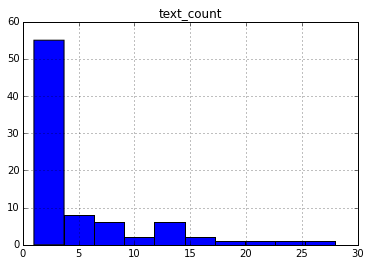

In [146]:
z.hist()